# 1 箱形图Boxplot
Boxplot可能是最常见的图形类型之一。它能够很好表示数据中的分布规律。箱型图方框的末尾显示了上下四分位数。极线显示最高和最低值，不包括异常值。seaborn中用boxplot函数制作箱形图。该章节主要内容有：
1. 基础箱形图绘制 Basic boxplot and input format
2. 自定义外观 Custom boxplot appearance
3. 箱型图的颜色设置 Control colors of boxplot
4. 分组箱图 Grouped Boxplot
5. 箱图的顺序设置 Control order of boxplot
6. 添加散点分布 Add jitter over boxplot
7. 显示各类的样本数 Show number of observation on boxplot
8. 箱形图隐藏的数据处理 Hidden data under boxplot

In [1]:
#调用seaborn
import seaborn as sns
#调用seaborn自带数据集
df = sns.load_dataset('iris')
#显示数据集
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## 1. 基础箱形图绘制 Basic boxplot and input format
+ 一个数值变量 One numerical variable only
+ 一个数值变量和多个分组 One numerical variable, and several groups
+ 多个数值变量 Several numerical variable
+ 水平箱型图 Horizontal boxplot with seaborn

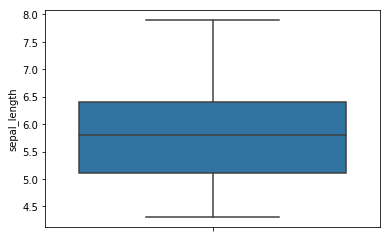

In [2]:
# 一个数值变量 One numerical variable only
# 如果您只有一个数字变量，则可以使用此代码获得仅包含一个组的箱线图。
# Make boxplot for one group only
# 显示花萼长度sepal_length
sns.boxplot( y=df["sepal_length"] );

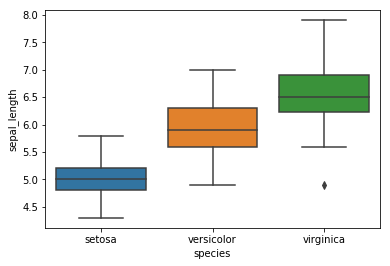

In [3]:
# 一个数值变量和多个分组 One numerical variable, and several groups
# 假设我们想要研究数值变量的分布，但是对于每个组分别进行研究。在这里，我们研究了3种花的萼片长度。
# x花的品种，y花萼长度
sns.boxplot( x=df["species"], y=df["sepal_length"] );

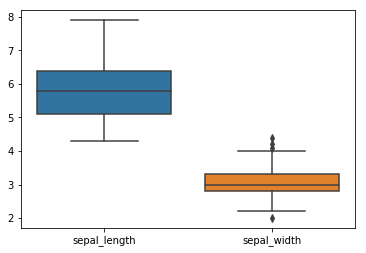

In [4]:
# 多个数值变量 Several numerical variable
# 可以研究几个数值变量的分布，比如说萼片的长度和宽度：
sns.boxplot(data=df.iloc[:,0:2]);

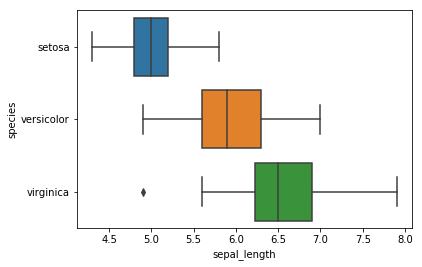

In [5]:
# 水平箱型图 Horizontal boxplot with seaborn
# 用seaborn将你的箱图水平转动是非常简单的。您可以切换x和y属性，或使用选项orient ="h"
sns.boxplot( y=df["species"], x=df["sepal_length"] );

## 2. 自定义外观 Custom boxplot appearance
+ 自定义线宽 Custom line width
+ 添加缺口 Add notch
+ 控制箱的尺寸 Control box sizes

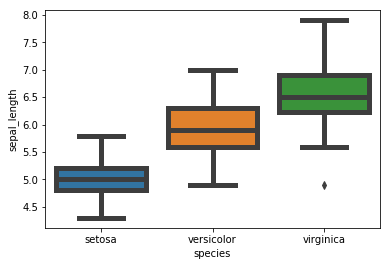

In [6]:
# 自定义线宽 Custom line width
# Change line width
# 根据linewidth改变线条宽度
sns.boxplot( x=df["species"], y=df["sepal_length"], linewidth=5);

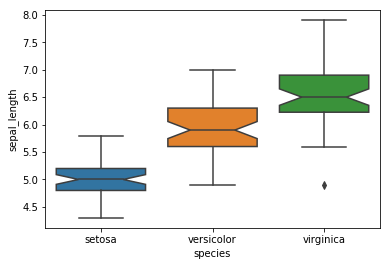

In [7]:
# 添加缺口 Add notch
# notch设置为true即可
sns.boxplot( x=df["species"], y=df["sepal_length"], notch=True);

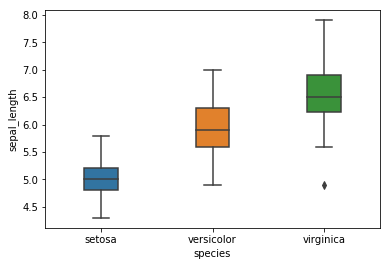

In [8]:
# 控制箱的尺寸 Control box sizes
# Change width
sns.boxplot( x=df["species"], y=df["sepal_length"], width=0.3);

## 3. 箱型图的颜色设置 Control colors of boxplot
+ 调色板的使用 Use a color palette 
+ 单种颜色的使用 Uniform color
+ 每组的特定颜色 Specific color for each group
+ 单组高亮 Highlight a group
+ 添加透明色 Add transparency to color

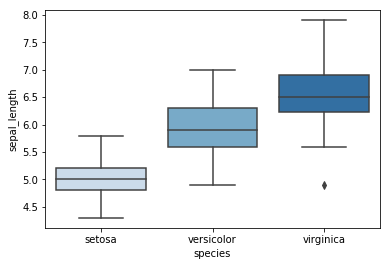

In [9]:
# 调色板的使用 Use a color palette 
# Python提出了几种调色板。您可以像Set1，Set2，Set3，Paired，BuPu一样调用RColorBrewer调色板，还有Blues或BuGn_r等调色板。
# 调色板各种颜色见 http://www.r-graph-gallery.com/38-rcolorbrewers-palettes/
# t通过plaette调用调色板，Use a color palette
sns.boxplot( x=df["species"], y=df["sepal_length"], palette="Blues");

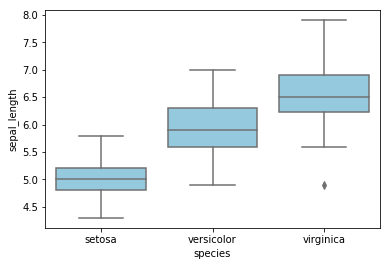

In [10]:
# 单种颜色的使用 Uniform color
# 当然您可以轻松地为每个盒子应用同样的颜色。最常见的是b: blue
# 颜色列表 https://matplotlib.org/examples/color/named_colors.html
sns.boxplot( x=df["species"], y=df["sepal_length"], color="skyblue");

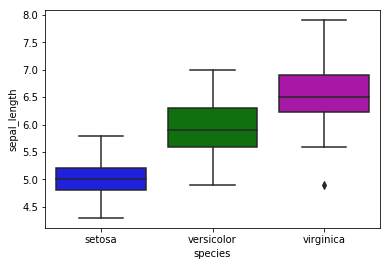

In [11]:
# 每组的特定颜色 Specific color for each group
# 用不用颜色描绘不同种类的花
my_pal = {"versicolor": "g", "setosa": "b", "virginica":"m"}
sns.boxplot( x=df["species"], y=df["sepal_length"], palette=my_pal);

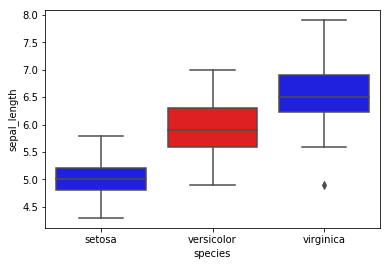

In [12]:
# 单组高亮 Highlight a group
# 设定某一组为红色，其他组为蓝色
my_pal = {species: "r" if species == "versicolor" else "b" for species in df.species.unique()}
sns.boxplot( x=df["species"], y=df["sepal_length"], palette=my_pal);

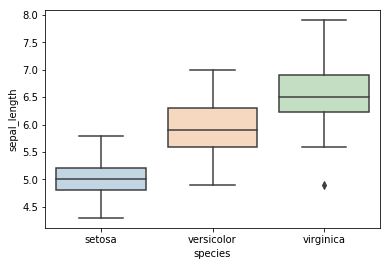

In [13]:
# 添加透明色 Add transparency to color
# usual boxplot 正常绘图
ax = sns.boxplot(x='species', y='sepal_length', data=df);
# Add transparency to colors 设置透明色
for patch in ax.artists:
    r, g, b, a = patch.get_facecolor()
    patch.set_facecolor((r, g, b, .3))

## 4. 分组箱图 Grouped Boxplot

In [14]:
# 当您有一个数值变量，几个组和子组时，将使用分组箱图。使用seaborn很容易实现。Y是您的数字变量，x是组列，而hue是子组列。
# 调用tips数据集
df_tips = sns.load_dataset('tips')
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


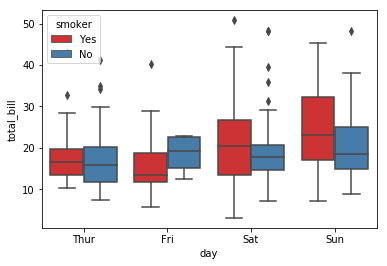

In [15]:
# Grouped boxplot 分组箱图
# x日期，y餐费，hue自组列，palette调色盘
sns.boxplot(x="day", y="total_bill", hue="smoker", data=df_tips, palette="Set1");

## 5. 箱图的顺序设置 Control order of boxplot

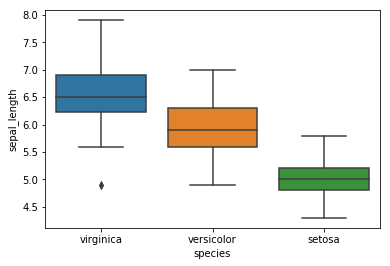

In [16]:
#如果您按特定顺序设定组，则箱图通常会提供更多信息。这对seaborn来说是可行的。 
# specific order 通过order自定义组
p1=sns.boxplot(x='species', y='sepal_length', data=df, order=["virginica", "versicolor", "setosa"]);

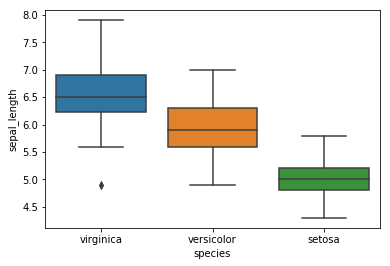

In [17]:
# 中位数由大到小排列
# Find the order 设定中位数
my_order = df.groupby(by=["species"])["sepal_length"].median().iloc[::-1].index
# Give it to the boxplot
sns.boxplot(x='species', y='sepal_length', data=df, order=my_order);

## 6. 添加散点分布 Add jitter over boxplot

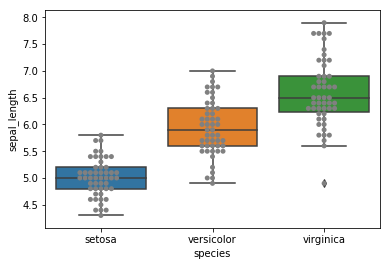

In [18]:
# 可以在箱线图上添加每种类别的散点分布情况
# Usual boxplot 正常绘图
ax = sns.boxplot(x='species', y='sepal_length', data=df)
# Add jitter with the swarmplot function 添加散点分布
ax = sns.swarmplot(x='species', y='sepal_length', data=df, color="grey")

## 7. 显示各类的样本数 Show number of observation on boxplot

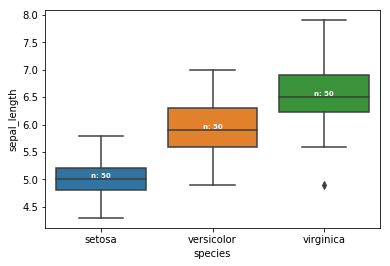

In [19]:
# 显示每个组的观察次数可能很有用

# 基础的箱形图
ax = sns.boxplot(x="species", y="sepal_length", data=df)
 
# Calculate number of obs per group & median to position labels 
# 计算各个种类的中位数
medians = df.groupby(['species'])['sepal_length'].median().values
# 统计各个种类的样本数
nobs = df['species'].value_counts().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " + i for i in nobs]
 
# Add it to the plot 
pos = range(len(nobs))
for tick,label in zip(pos,ax.get_xticklabels()):
    ax.text(pos[tick], medians[tick] + 0.03, nobs[tick], horizontalalignment='center', size='x-small', color='w', weight='semibold')

## 8. 箱形图隐藏的数据处理 Hidden data under boxplot
+ 添加分布散点图 boxplot with jitter
+ 使用小提琴图 use violinplot

箱形图总结了几个组的数值变量的分布。但是箱形图的问题不仅是丢失信息，这可能会结果有偏差。如果我们考虑下面的箱形图，很容易得出结论，'C'组的价值高于其他组。但是，我们无法看到每个组中点的基本分布是什么，也没有观察每个组的观察次数。所以我们需要对隐藏的数据进行处理

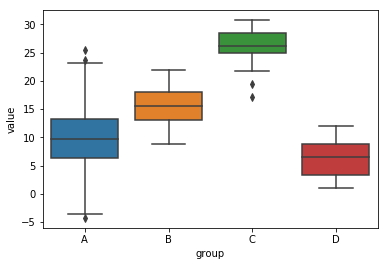

In [20]:
# libraries and data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Dataset:
a = pd.DataFrame({ 'group' : np.repeat('A',500), 'value': np.random.normal(10, 5, 500) })
b = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(13, 1.2, 500) })
c = pd.DataFrame({ 'group' : np.repeat('B',500), 'value': np.random.normal(18, 1.2, 500) })
d = pd.DataFrame({ 'group' : np.repeat('C',20), 'value': np.random.normal(25, 4, 20) })
e = pd.DataFrame({ 'group' : np.repeat('D',100), 'value': np.random.uniform(12, size=100) })
df=a.append(b).append(c).append(d).append(e)
 
# Usual boxplot
sns.boxplot(x='group', y='value', data=df);

Text(0.0, 1.0, 'Boxplot with jitter')

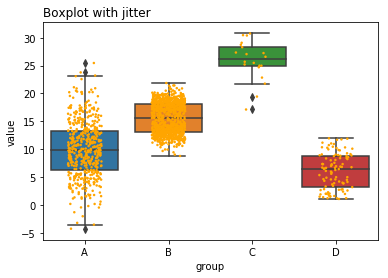

In [21]:
# 添加分布散点图 boxplot with jitter
ax = sns.boxplot(x='group', y='value', data=df)
# 通过stripplot添加分布散点图，jitter设置数据间距
ax = sns.stripplot(x='group', y='value', data=df, color="orange", jitter=0.2, size=2.5)
plt.title("Boxplot with jitter", loc="left")

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.0, 1.0, 'Violin plot')

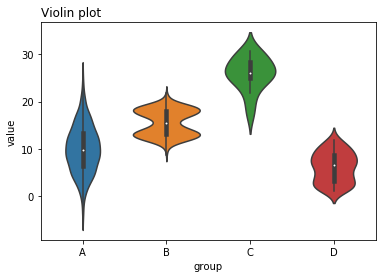

In [22]:
# 使用小提琴图 use violinplot
sns.violinplot( x='group', y='value', data=df)
plt.title("Violin plot", loc="left")